## Mechanical system with spring, mass and damping
Consider a mechanical oscillator including a spring 
$$ F_{c}(t) = c ~ x(t) $$
with $ c > 0 $, a damping
$$ 
F_{D}(t) = D ~ v(t) = D ~ \dot{x}(t)
$$
with D > 0, and a mass
$$ F_{m}(t) = m ~ a(t) = m ~ \ddot{x}(t) $$

with m > 0. This system is excited by an external force $ F_{ex}(t) $ and all forces are summarized to

$$ F_{m}(t) + F_{D}(t) + F_{c}(t) = m ~ \ddot{x}(t) + D ~ \dot{x}(t) + c ~ x(t) = F_{ex}(t) \text{.} $$

The complete mechanical system is portrayed in the figure below. 

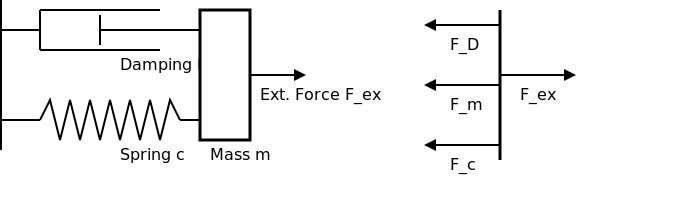

In [1]:
foo = """
<svg height="210" width="700">
    <defs>
    <!-- arrowhead marker definition -->
    <marker id="arrow" viewBox="0 0 10 10" refX="5" refY="5"
        markerWidth="6" markerHeight="6"
        orient="auto-start-reverse">
      <path d="M 0 0 L 10 5 L 0 10 z" />
    </marker>
    </defs>
  <line x1="0" y1="0" x2="0" y2="150" style="stroke:rgb(0,0,0);stroke-width:4" />
  <!-- Damping -->
  <line x1="0" y1="30" x2="40" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="10" x2="40" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="10" x2="160" y2="10" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="40" y1="50" x2="160" y2="50" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="100" y1="15" x2="100" y2="45" style="stroke:rgb(0,0,0);stroke-width:2" />
  <line x1="100" y1="30" x2="200" y2="30" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="120" y="70" fill="black">Damping D</text>
  <!-- Spring -->
  <line x1="0" y1="120" x2="40" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <polyline points="40,120 50,100 60,140 70,100 80,140 90,100 100,140 110,100 120,140 130,100 140,140 150,100 160,140 170,100 180,120"
  style="fill:none;stroke:black;stroke-width:2" />
  <line x1="180" y1="120" x2="200" y2="120" style="stroke:rgb(0,0,0);stroke-width:2" />
  <text x="120" y="160" fill="black">Spring c</text>
  <!-- Mass -->
  <rect x="200" y="10" width="50" height="130" style="fill:rgb(255,255,255);stroke-width:3;stroke:rgb(0,0,0)" />
  <text x="210" y="160" fill="black">Mass m</text>
  <!-- External Force -->
  <line x1="250" y1="75" x2="300" y2="75" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
  <text x="260" y="100" fill="black">Ext. Force F_ex</text>
  <!-- Overview Forces -->
  <line x1="500" y1="10" x2="500" y2="160" style="stroke:rgb(0,0,0);stroke-width:3" />
  <line x1="430" y1="25" x2="500" y2="25" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="430" y1="85" x2="500" y2="85" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="430" y1="145" x2="500" y2="145" style="stroke:rgb(0,0,0);stroke-width:2" marker-start="url(#arrow)" />
  <line x1="500" y1="75" x2="570" y2="75" style="stroke:rgb(0,0,0);stroke-width:2" marker-end="url(#arrow)" />
  <text x="450" y="50" fill="black">F_D</text> 
  <text x="450" y="110" fill="black">F_m</text>
  <text x="450" y="170" fill="black">F_c</text>
  <text x="520" y="100" fill="black">F_ex</text>
</svg> 
"""
display("image/svg+xml", foo)

The second order differential equation 
$$ \ddot{x}(t) + \frac{D}{m} \dot{x}(t) + \frac{c}{m} x(t) ~=~ \frac{1}{m} F_{ex}(t) $$
is transfered with

$$ \frac{D}{m} = 2 ~ d ~ \omega_{0} \quad \text{,} \quad \frac{c}{m} = \omega_{0}^{2} \quad \text{,} \quad \frac{1}{m} = K ~ \omega_{0}^{2} \quad \text{and} \quad F_{ex}(t) = u(t) $$

to the general oscillation equation

$$
\begin{align}
\ddot{y}(t) + 2 d ~ \omega_{0} ~ \dot{y}(t) + \omega_{0}^{2} ~ y(t) ~=~ K ~ \omega_{0}^{2} ~ u(t) \text{.} \label{eq:gen_oscil} \tag{1}
\end{align}
$$

Equation $ \eqref{eq:gen_oscil} $ is noted with $ x_{1}(t) = y(t) $ and $ x_{2}(t) = \dot{y}(t) $ as the first order differential equation

$$
\begin{align}
\begin{pmatrix}
\dot{x}_{1}(t) \\
\dot{x}_{2}(t)
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
- \omega_{0}^{2} & - 2 d ~ \omega_{0}
\end{pmatrix}
\begin{pmatrix}
x_{1}(t) \\
x_{2}(t)
\end{pmatrix}
+
\begin{pmatrix}
0 \\
K ~ \omega_{0}^{2}
\end{pmatrix}
u(t)
\end{align}
$$

### Stability

The uncontrolled system (for $u(t) = 0$) is stable if matrix 

$$ 
A = \begin{pmatrix}
0 & 1 \\
- \omega_{0}^{2} & - 2 d ~ \omega_{0}
\end{pmatrix} 
$$

has only eigenvalues in the left complex space. The eigenvalues are calculated with

$$ det(\lambda I - A) = \lambda ~ (\lambda + 2 d \omega_{0}) + \omega_{0}^2 = \lambda^2 + 2 d ~ \omega_{0} \lambda + \omega_{0}^{2} = 0 $$

and thus one holds
$$ \lambda = -d ~ \omega_{0} \pm j \omega_{0} ~ \sqrt{1 - d^{2}} \text{.} $$

The uncontrolled system is always stable if $d > 0$ and $\omega_{0} > 0$, which is both guaranteed for usual mechanical systems. Furthermore, a damping $d < 0$ implies complex eigenvalues and leads to an oscillating behaviour of the solution trajectory $y(t)$.

### Numerical solution

The controlled mechancial oscillator $ \dot{x}(t) = A ~ x(t) + b ~ u(t) $ is simulated with a numerical integration method instead of calculating the solution via eigenvalues and eigenvectors. For further information about numerical integration see [Wikipedia](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) and the [DifferentialEquations documentation](http://docs.juliadiffeq.org/latest/index.html).

The initial values are defined with

In [2]:
x₀ = [2.0, 1.0]; # Inital values
tspan = (0.0, 50.0); # Time range
d = 0.5; # Damping
ω₀ = 0.7; # Eigenfrequency
param = [d, ω₀];

The right-hand side $ A ~ x(t) + b ~ u(t) $  with an arbitrary input - here $u(t) = sign( sin(t))$ is chosen as a periodic excitation - and gain $K$ is defined as a function. The input is generated by the external force in the sense of a mechanical oscillator.

In [3]:
function mechanical_oscillator(dx, x, p, t)
    u = sign(sin(t)) # Input: periodic excitation 
    K = 0.3 # Gain or amplification
    
    dx[1] = x[2]
    dx[2] = -(p[2]^2)*x[1] - 2*p[1]*p[2]*x[2] + K*p[2]^2 * u
end

mechanical_oscillator (generic function with 1 method)

Differential equations are solved in two steps in Julia. Firstly, the mathematical problem is formulated and secondly the mathematical problem is solved with a "numerical integration" method. Tolerances are set to specify the precision of the solution.  

In [4]:
using DifferentialEquations
mech_osc_problem = ODEProblem(mechanical_oscillator,x₀,tspan, param); # Build of the ODE problem
mech_osc_solution = solve(mech_osc_problem,Tsit5(),reltol=1e-8,abstol=1e-8); # Solution of the ODE problem

The calculated solution is figured in a plot.

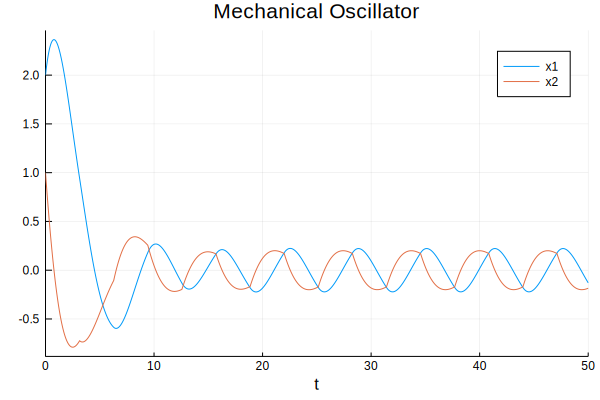

In [5]:
using Plots
plot(mech_osc_solution, title="Mechanical Oscillator", label=["x1" "x2"])